In [30]:
import sys
del sys.modules['etl']

In [31]:
import etl as etl

In [32]:
data = etl.data_analysis.data_read()

In [33]:
etl.data_analysis.stats_summary(data)

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


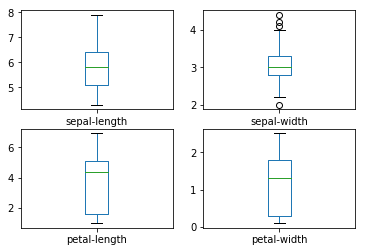

In [34]:
etl.data_analysis.univariate_plt(data, 'box')

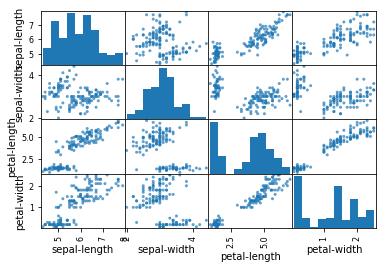

In [36]:
etl.data_analysis.multivariate_plt(data)

In [83]:
del sys.modules['algo']

In [84]:
import algo as algo

In [85]:
X_train_std, X_validation_std, Y_train, Y_validation = algo.algo.preprocessing(data)

C:\Users\AmirB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [86]:
logreg = algo.algo.model_fit(X_train_std, Y_train)
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
##print accuracy
algo.algo.model_accuracy(logreg, X_validation_std, Y_validation)

Accuracy of logistic regression classifier on test set: 0.90


In [88]:
algo.algo.confusion_matrix(Y_validation)

AttributeError: 'function' object has no attribute 'logreg'

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [69]:
##print confusion matrix to understand more
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_validation, Y_pred)
print(confusion_matrix)

[[ 7  0  0]
 [ 0 12  0]
 [ 0  3  8]]


#### https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

### Compute precision, recall, F-measure and support

In [70]:
from sklearn.metrics import classification_report
print(classification_report(Y_validation, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.80      1.00      0.89        12
 Iris-virginica       1.00      0.73      0.84        11

    avg / total       0.92      0.90      0.90        30



In [72]:
import etl as etl

In [74]:
etl.data_analysis.class_dist(data)

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
##https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [11]:
import pandas as pd
import numpy as np

In [3]:
##nak customer information dataset 
data = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')

In [7]:
##target variable (y) to predict whether the client has subscribed a term deposit
##build scripts for each one of the below
##build etl - cleaning data
##build visualisations to see which feature will be good predictor - kaggle have good example
##over-sampling using SMOTE - to solve class inbalance problem
##feature selection - recusive elimination technique
##fitting model
##validating results

In [8]:
##etl

data = data.dropna()

##cleaning eduction feature - too many categories
##grouping all basics
data['education'] = np.where(data['education'].str.contains('basic'), 'Basic', data['education'])
data['education'].unique()

(41188, 21)

In [20]:
#data exploring

##predictor is unbalanced towards no subscriptions
data['y'].value_counts()

count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", round(pct_of_no_sub*100,0), '%')
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", round(pct_of_sub*100, 0), '%')

percentage of no subscription is 89.0 %
percentage of subscription 11.0 %
